In [6]:
import os
import torch
from diffusers import StableDiffusionXLPipeline, DiffusionPipeline
from diffusers.utils import load_image, make_image_grid
from safetensors.torch import load_file
from PIL import Image

In [7]:
# 경로 설정
base_ckpt_path = "/home/work/safetensors/cartoonxl_v10.safetensors"

# 기본 모델 로드
pipe = StableDiffusionXLPipeline.from_single_file(base_ckpt_path, torch_dtype=torch.float16).to('cuda')

# 리파이너 모델 로드
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")



Some weights of the model checkpoint were not used when initializing CLIPTextModelWithProjection: 
 ['text_model.embeddings.position_ids']


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [20]:
prompts = "Pikachu crying a starry night, sad, content, forest background"
#negative_prompt = "multiple tails, more than one tail, two tails, extra tails, three ears, four ears, extra ears, more than two ears, distorted body, misshapen body, disproportionate body, irregular body, twisted body, warped body, unnatural body"
steps = 35

# 이미지 생성
base_image = pipe(
    prompt=prompts, 
    #negative_prompt=negative_prompt, 
    num_inference_steps=steps, 
    guidance_scale=7.2, 
)


  0%|          | 0/35 [00:00<?, ?it/s]

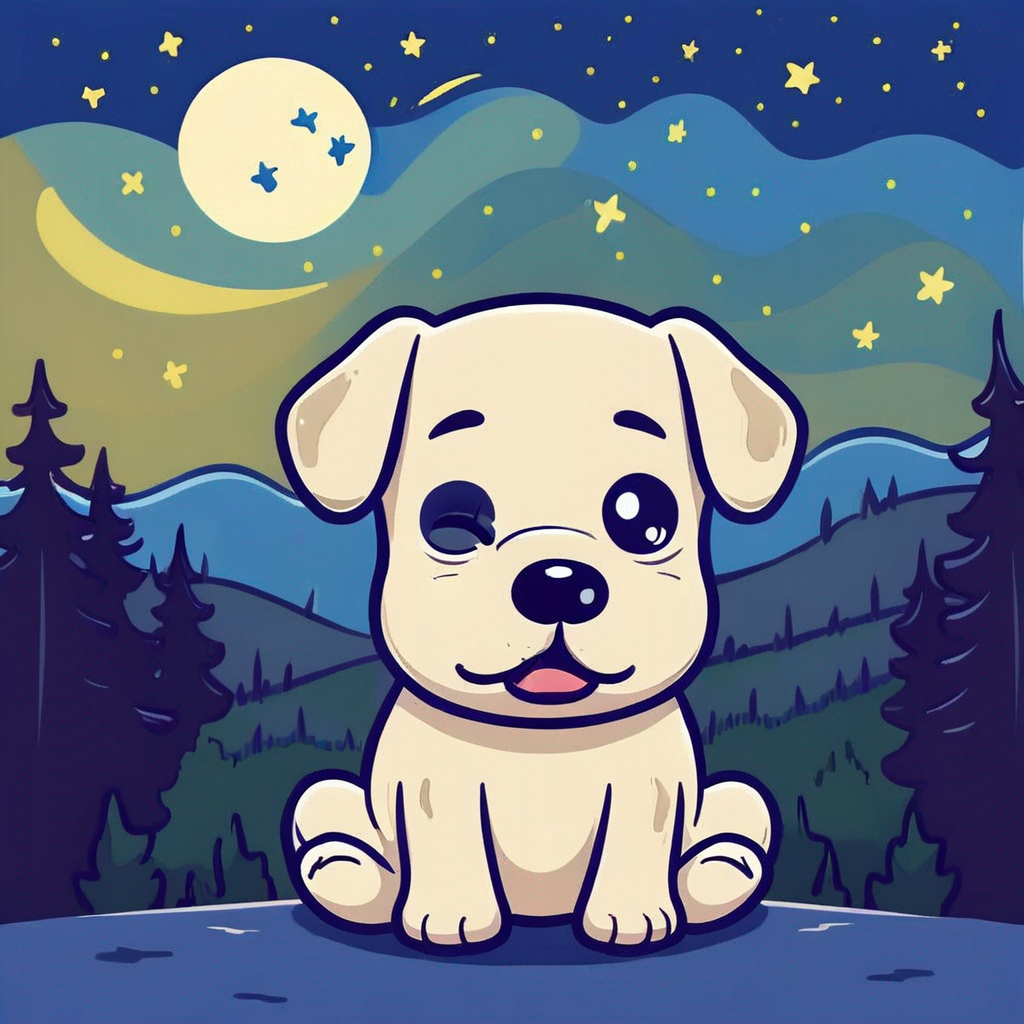

In [21]:
latent_image = base_image.images[0]
latent_image.show()

In [22]:
# 이미지 리파인
refine_image = refiner(
    prompt=prompts,
    num_inference_steps=steps,
    denoising_start=0.8,
    image=latent_image
)

  0%|          | 0/8 [00:00<?, ?it/s]

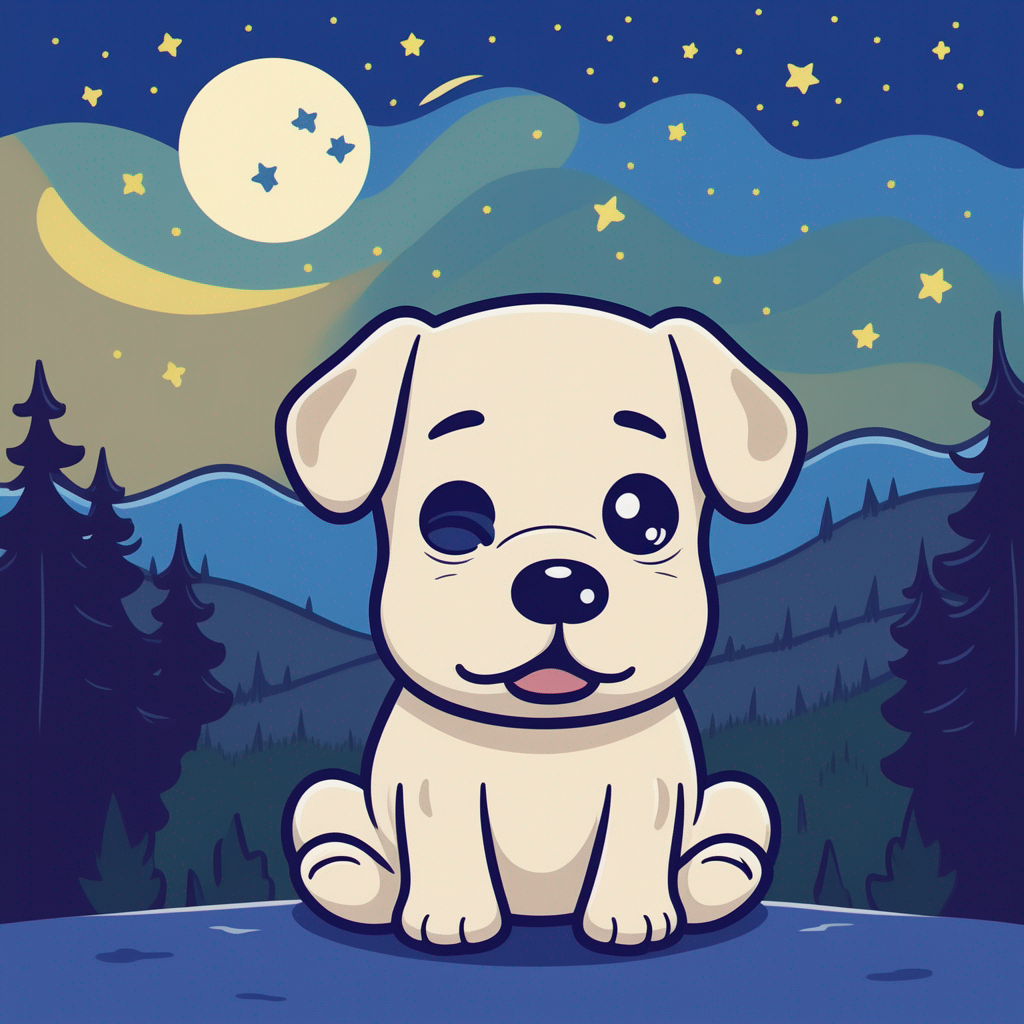

In [23]:

refined_image = refine_image.images[0]
refined_image.show()